In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

## Segment 0

In [2]:
df_0 = pd.read_csv('segment_0.csv')

In [3]:
# Assuming df is your DataFrame and 'attributes_patterns' is your column
df_0['attributes_patterns'] = df_0['attributes_patterns'].str.strip('[]').str.split(', ')

# Flatten the list of lists and count occurrences of each word
word_counts = Counter(word for words in df_0['attributes_patterns'] for word in words)

# Create a DataFrame from the word counts
df_word_counts = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Count'])

# Reset the index
df_word_counts.reset_index(inplace=True)

# Rename the columns
df_word_counts.columns = ['Word', 'Count']

# Sort the DataFrame in descending order of the count
df_word_counts = df_word_counts.sort_values(by='Count', ascending=False)

# Reset the index after sorting
df_word_counts.reset_index(drop=True, inplace=True)

df_word_counts = df_word_counts[df_word_counts['Word'] != '']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'[ h1\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'’ t\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'/b ]\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'[ list\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'[ h3\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'* ]\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'[ b\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'* *\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'[ h2\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'[ url=https\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'] random\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'/list ]\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'//storage.googleapis.com/rebos_american_hamburger_stash/grabbing_issues_2.mp4 ]\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'//storage.googleapis.com/rebos_american_hamburger_stash/grabbing_issues.mp4 ]\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'[ /h3\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'/h2 ]\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'/h1 ]\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'//storage.googleapis.com/rebos_american_hamburger_stash/another_bomba_bridge.mp4 ]\'']

# Get the top 200 words
top_200_words = df_word_counts['Word'].head(200)
top_200_words.reset_index(drop=True, inplace=True)
top_200_words

0            'good game'
1             'fun game'
2             'much fun'
3           'great game'
4          'quick match'
             ...        
195              'gg ez'
196     'various levels'
197            'bs luck'
198    'funny mechanics'
199         'crazy ride'
Name: Word, Length: 200, dtype: object

In [4]:
# Iterate over the top 200 words and create new columns in the original DataFrame
for word in top_200_words:
    df_0[word] = df_0['attributes_patterns'].apply(lambda x: 1 if word in x else 0)

/var/folders/mn/02zvw24x29v3xxdzdmx604fc0000gn/T/ipykernel_7939/3204370349.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_0[word] = df_0['attributes_patterns'].apply(lambda x: 1 if word in x else 0)
/var/folders/mn/02zvw24x29v3xxdzdmx604fc0000gn/T/ipykernel_7939/3204370349.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_0[word] = df_0['attributes_patterns'].apply(lambda x: 1 if word in x else 0)
/var/folders/mn/02zvw24x29v3xxdzdmx604fc0000gn/T/ipykernel_7939/3204370349.py:3: PerformanceWarning: DataFrame is highly

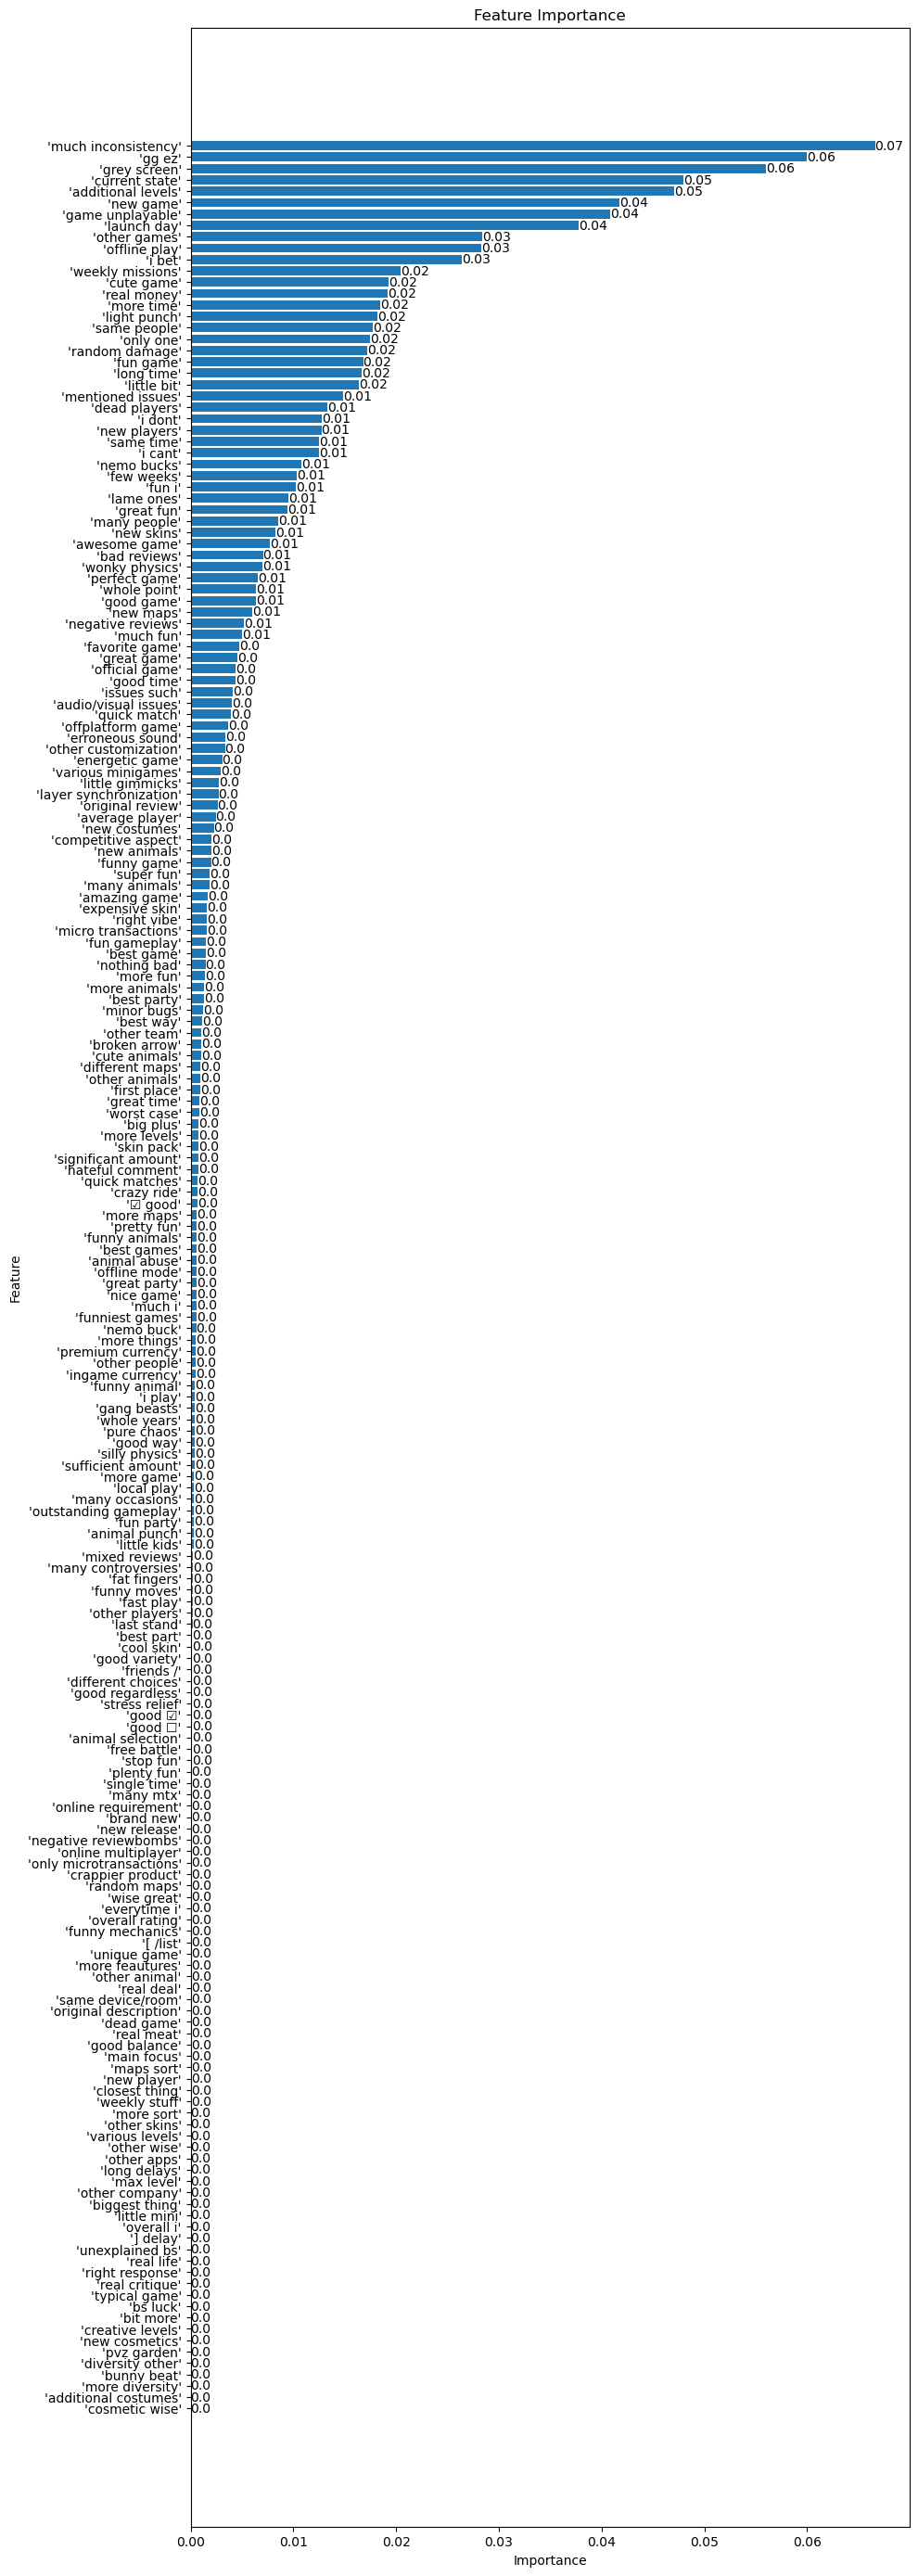

In [5]:
# Define your X and Y
X = df_0.drop(['voted_up', 
             'recommendationid', 
             'language', 
             'review', 
             'timestamp_created', 
             'timestamp_updated', 
             'votes_up', 
             'votes_funny', 
             'weighted_vote_score', 
             'comment_count', 
             'steam_purchase', 
             'received_for_free', 
             'written_during_early_access', 
             'hidden_in_steam_china', 
             'steam_china_location', 
             'timestamp_dev_responded', 
             'developer_response', 
             'steamid', 
             'num_games_owned', 
             'num_reviews', 
             'playtime_forever', 
             'playtime_last_two_weeks', 
             'playtime_at_review', 
             'last_played', 
             'attributes_patterns', 
             'cluster', 
             'sentiment_scores_pos_vader',	
             'sentiment_score_pos_vader',	
             'sentiment_score_review_spacy' , 
             'sentiment_score_pos_spacy'], 
             axis=1)
Y = df_0['voted_up']

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=6954)

# Train the model
clf.fit(X, Y)

# Now you can use clf to predict the 'voted_up' value for new data
Y_pred = clf.predict(X)

# Get the feature importances from the trained classifier
feature_importances = clf.feature_importances_

# Create a DataFrame with feature names and importances
df_feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame in descending order of importance
df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=True)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 35))
plt.barh(df_feature_importances['Feature'], df_feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Add the numerical values to the plot
for i, v in enumerate(df_feature_importances['Importance']):
    plt.text(v, i, str(round(v, 2)), color='black', va='center')
plt.show()

## Segment 1

In [6]:
df_1 = pd.read_csv('segment_1.csv')

In [7]:
# Assuming df is your DataFrame and 'attributes_patterns' is your column
df_1['attributes_patterns'] = df_1['attributes_patterns'].str.strip('[]').str.split(', ')

# Flatten the list of lists and count occurrences of each word
word_counts = Counter(word for words in df_1['attributes_patterns'] for word in words)

# Create a DataFrame from the word counts
df_word_counts = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Count'])

# Reset the index
df_word_counts.reset_index(inplace=True)

# Rename the columns
df_word_counts.columns = ['Word', 'Count']

# Sort the DataFrame in descending order of the count
df_word_counts = df_word_counts.sort_values(by='Count', ascending=False)

# Reset the index after sorting
df_word_counts.reset_index(drop=True, inplace=True)

df_word_counts = df_word_counts[df_word_counts['Word'] != '']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'[ h1\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'’ t\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'/b ]\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'[ list\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'[ h3\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'* ]\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'[ b\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'* *\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'[ h2\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'[ url=https\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'] random\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'/list ]\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'//storage.googleapis.com/rebos_american_hamburger_stash/grabbing_issues_2.mp4 ]\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'//storage.googleapis.com/rebos_american_hamburger_stash/grabbing_issues.mp4 ]\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'[ /list\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'[ /h3\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'/h2 ]\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'/h1 ]\'']
df_word_counts = df_word_counts[df_word_counts['Word'] != '\'//storage.googleapis.com/rebos_american_hamburger_stash/another_bomba_bridge.mp4 ]\'']

# Get the top 200 words
top_200_words = df_word_counts['Word'].head(200)
top_200_words.reset_index(drop=True, inplace=True)
top_200_words

0             'good game'
1              'fun game'
2            'great game'
3                'game i'
4          'offline mode'
              ...        
195       'other reviews'
196    'playable offline'
197          'casual fun'
198            'most fun'
199            'best way'
Name: Word, Length: 200, dtype: object

In [8]:
# Iterate over the top 200 words and create new columns in the original DataFrame
for word in top_200_words:
    df_1[word] = df_1['attributes_patterns'].apply(lambda x: 1 if word in x else 0)

/var/folders/mn/02zvw24x29v3xxdzdmx604fc0000gn/T/ipykernel_7939/804602580.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_1[word] = df_1['attributes_patterns'].apply(lambda x: 1 if word in x else 0)
/var/folders/mn/02zvw24x29v3xxdzdmx604fc0000gn/T/ipykernel_7939/804602580.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_1[word] = df_1['attributes_patterns'].apply(lambda x: 1 if word in x else 0)
/var/folders/mn/02zvw24x29v3xxdzdmx604fc0000gn/T/ipykernel_7939/804602580.py:3: PerformanceWarning: DataFrame is highly fr

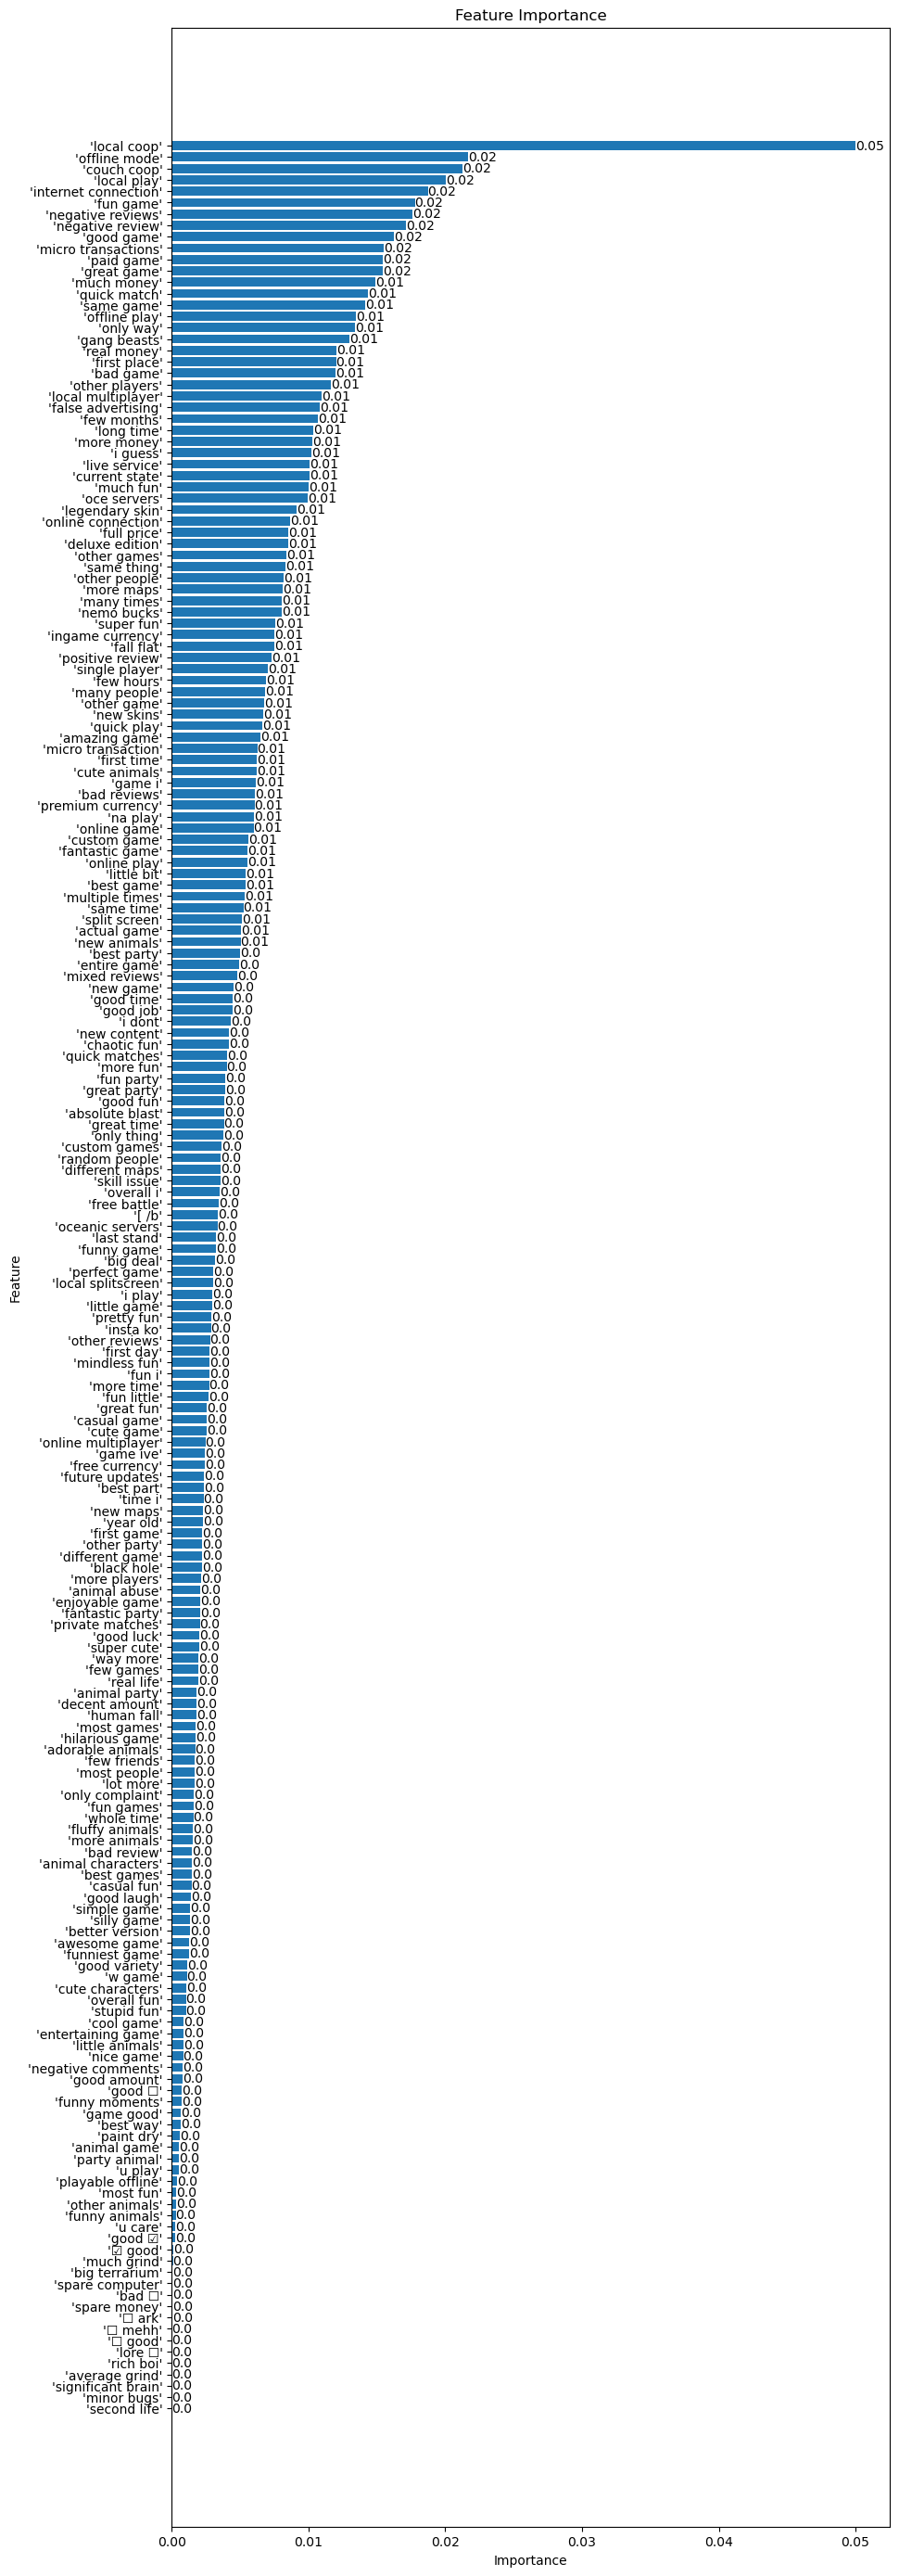

In [9]:
# Define your X and Y
X = df_1.drop(['voted_up', 
             'recommendationid', 
             'language', 
             'review', 
             'timestamp_created', 
             'timestamp_updated', 
             'votes_up', 
             'votes_funny', 
             'weighted_vote_score', 
             'comment_count', 
             'steam_purchase', 
             'received_for_free', 
             'written_during_early_access', 
             'hidden_in_steam_china', 
             'steam_china_location', 
             'timestamp_dev_responded', 
             'developer_response', 
             'steamid', 
             'num_games_owned', 
             'num_reviews', 
             'playtime_forever', 
             'playtime_last_two_weeks', 
             'playtime_at_review', 
             'last_played', 
             'attributes_patterns', 
             'cluster', 
             'sentiment_scores_pos_vader',	
             'sentiment_score_pos_vader',	
             'sentiment_score_review_spacy' , 
             'sentiment_score_pos_spacy'], 
             axis=1)
Y = df_1['voted_up']

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=6954)

# Train the model
clf.fit(X, Y)

# Now you can use clf to predict the 'voted_up' value for new data
Y_pred = clf.predict(X)

# Get the feature importances from the trained classifier
feature_importances = clf.feature_importances_

# Create a DataFrame with feature names and importances
df_feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame in descending order of importance
df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=True)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 35))
plt.barh(df_feature_importances['Feature'], df_feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Add the numerical values to the plot
for i, v in enumerate(df_feature_importances['Importance']):
    plt.text(v, i, str(round(v, 2)), color='black', va='center')
plt.show()